In [75]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [76]:
climbdf = pd.read_csv("cleaned_data/cleaned-climbs.csv")

In [77]:
climbdf.head()

,Unnamed: 0,climb_id,climb_name,climb_link,fa_year,feet,page_views,pitches,avg_stars,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,"type_TR,",type_aid,type_alpine,type_boulder,type_ice,type_mixed,type_sport,type_trad,guide_aid_grade,guide_boulder_grade,guide_ice_grade,guide_mixed_grade,guide_rock_grade,concensus_aid_grade,concensus_boulder_grade,concensus_ice_grade,concensus_mixed_grade,concensus_rock_grade,guide_aid_grade_number,guide_rock_grade_number,guide_boulder_grade_number,concensus_rock_grade_number,concensus_boulder_grade_number,concensus_ice_grade_number,guide_ice_grade_number,concensus_mixed_grade_number,guide_mixed_grade_number,concensus_aid_grade_number,state,latitude,longitude
0,0,105714713,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8-,NaN,8,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
1,1,105714716,paperboy-centerfold,http://www.mountainproject.com/v/paperboy-cent...,NaN,60,1320,1,2.1333,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8,NaN,8,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
2,2,105714719,blockhead,http://www.mountainproject.com/v/blockhead/105...,NaN,70,1106,1,2.3529,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,0,0,0,0,0,5.10,0,0,0,0,5.10,NaN,10,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
3,3,105714722,central-yellow-wall,http://www.mountainproject.com/v/central-yello...,NaN,20,1377,NaN,3.2857,/destinations/,/v/south-dakota/105708963,/v/custer-state-park/106058091,/v/sylvan-lake-/106887955,/v/outlets/105714243,/v/campground-boulder/105714321,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,0,0,V3,0,0,0,0,V3,0,0,0,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN,South Dakota,43.8477,-103.5668
4,4,105714728,waves,http://www.mountainproject.com/v/waves/105714728,NaN,180,9063,2,3.4797,/destinations/,/v/south-dakota/105708963,/v/mount-rushmore-national-memorial/106062228,/v/south-seas/105714249,/v/shipyard-rock/105714333,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,5.8,0,0,0,0,5.8,NaN,8,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,43.8864,-103.4670


In [78]:
climbdf.state.unique()

array(['South Dakota', 'Wyoming', 'Utah', 'California', 'Wisconsin',
       'Nevada', 'Arizona', 'Idaho', 'Colorado', 'New Mexico', 'Oregon',
       'Washington', 'New York', 'Connecticut', 'Massachusetts', 'Texas',
       'Minnesota', 'Virginia', 'Kentucky', 'West Virginia', 'Oklahoma',
       'New Hampshire', 'North Carolina', 'Michigan', 'Tennessee',
       'Georgia', 'Missouri', 'Arkansas', 'Alabama', 'Alaska', 'Illinois',
       'Montana', 'Ohio', 'Maine', 'Maryland', 'Pennsylvania', 'Vermont',
       'Iowa', 'Hawaii', 'New Jersey', 'Rhode Island'], dtype=object)

In [79]:
x = climbdf.groupby("state")['climb_id'].count()
#x = x.sort_values(ascending = False)

In [80]:
y = x.sort_values(ascending = False)
print y

state
Colorado          3912
California        3481
Utah              2315
Arizona           1234
New Hampshire      699
Nevada             617
Wyoming            592
New Mexico         533
Washington         531
Kentucky           442
New York           439
Wisconsin          430
West Virginia      387
Tennessee          363
North Carolina     345
Oregon             326
Idaho              301
South Dakota       275
Texas              251
Minnesota          182
Arkansas           175
Pennsylvania       142
Alabama            125
Georgia             97
Montana             95
Illinois            67
Rhode Island        56
Virginia            55
Oklahoma            54
Connecticut         44
Massachusetts       42
Maine               42
Vermont             34
Alaska              23
Maryland            22
Iowa                18
Michigan            11
Hawaii               9
Missouri             3
Ohio                 2
New Jersey           2
Name: climb_id, dtype: int64


In [81]:
a = y.values
b = range(len(y))
c = y.index.values

print len(b)

41


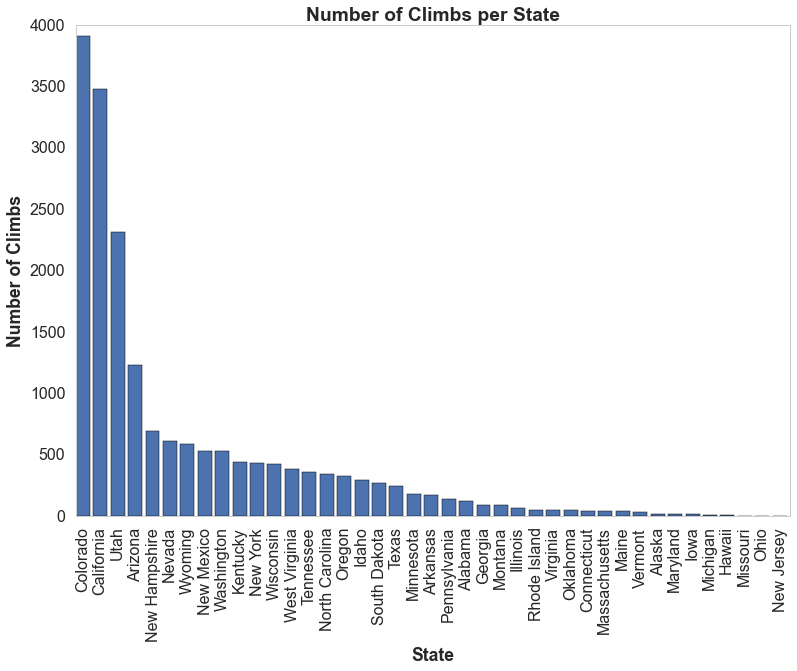

In [84]:
plt.bar(b,a)
plt.xticks(b,c, rotation = 'vertical', ha = 'left')
plt.grid(False)
plt.ylabel('Number of Climbs', fontweight = 'bold')
plt.xlabel('State', fontweight = 'bold')
plt.xlim(0,len(b))
plt.title('Number of Climbs per State', fontweight = 'bold')

In [85]:
userdf = pd.read_csv("cleaned_data/cleaned-users.csv")

In [86]:
userdf.head()

,Unnamed: 0,user_id,climbs_trad,gender,age,climbs_aid,user_country,user_state,user_city,user_zip_code,climbs_ice,climbs_boulder,user_link,climbs_mixed,climbs_sport,member_date,user_name,lead_diff_sport,boulder_diff,follow_diff_sport,lead_diff_ice,lead_diff_trad,follow_diff_ice,follow_diff_trad,follow_diff_mixed,lead_diff_mixed,follow_diff_aid,lead_diff_aid,lead_diff_sport_number,follow_diff_aid_number,lead_diff_ice_number,follow_diff_sport_number,follow_diff_mixed_number,lead_diff_aid_number,lead_diff_mixed_number,lead_diff_trad_number,boulder_diff_number,follow_diff_ice_number,follow_diff_trad_number,longitude,latitude,user_city_geo,user_state_geo,user_zip_geo,user_country_geo
0,0,10101,0,0,37,0,USA,WA,Seattle,NaN,0,0,https://www.mountainproject.com/u/michael-koma...,0,0,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",michael-komarnitsky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.329447,47.603569,Seattle,Washington,NaN,USA
1,1,10102,1,0,NaN,1,USA,NaN,NaN,NaN,1,0,https://www.mountainproject.com/u/ben-mottinge...,1,1,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",ben-mottinger,5.10d,NaN,5.11c,WI4,5.10a,WI6,5.11a,M8,M5,C1,C3,11.5,1,4,13,8,3,5,10.0,NaN,6,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10106,1,0,35,1,USA,NM,Albuquerque,NaN,0,1,https://www.mountainproject.com/u/patrick-vern...,0,1,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",patrick-vernon,5.13a,V8,5.13a,NaN,5.12d,NaN,5.12d,NaN,NaN,C2,C2,16.0,2,NaN,16,NaN,2,NaN,15.5,8,NaN,15.5,-106.649049,35.084233,Albuquerque,New Mexico,NaN,USA
3,3,10107,0,NaN,NaN,0,USA,NaN,NaN,NaN,0,0,https://www.mountainproject.com/u/matt-bauman/...,0,0,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",matt-bauman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10108,0,0,36,0,USA,CO,Denver,NaN,0,0,https://www.mountainproject.com/u/quinn-steven...,0,0,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",quinn-stevens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-104.992298,39.740012,Denver,Colorado,NaN,USA


In [87]:
userdf['user_state_geo'].unique()

array(['Washington', nan, 'New Mexico', 'Colorado', 'Wisconsin', 'Arizona',
       'Maryland', 'Utah', 'California', 'Tennessee', 'Nebraska',
       'New York', 'Wyoming', 'Montana', 'Idaho', 'Alabama', 'Nevada',
       'North Carolina', 'Illinois', 'Arkansas', 'Minnesota',
       'South Dakota', 'Oregon', 'Texas', 'Hawaii', 'New Hampshire',
       'Missouri', 'Connecticut', 'Florida', 'Indiana', 'Georgia', 'Ohio',
       'Maine', 'Kansas', 'Michigan', 'Vermont', 'Kentucky', 'New Jersey',
       'Alaska', 'Oklahoma', 'West Virginia', 'Virginia', 'Pennsylvania',
       'Massachusetts', 'Mississippi', 'South Carolina',
       'District of Columbia', 'Iowa', 'Louisiana', 'North Dakota',
       'Rhode Island', 'District Of Columbia', 'Delaware'], dtype=object)

In [88]:
x = userdf.groupby('user_state_geo')['user_id'].count()

In [89]:
y = x.sort_values(ascending = False)

dc1 = x['District of Columbia']
dc2 = x['District Of Columbia']

y = x.drop(['District of Columbia', 'District Of Columbia'])

y['District of Columbia'] = dc1 + dc2

z = y.sort_values(ascending = False)

a = z.values
b = range(len(z))
c = z.index.values

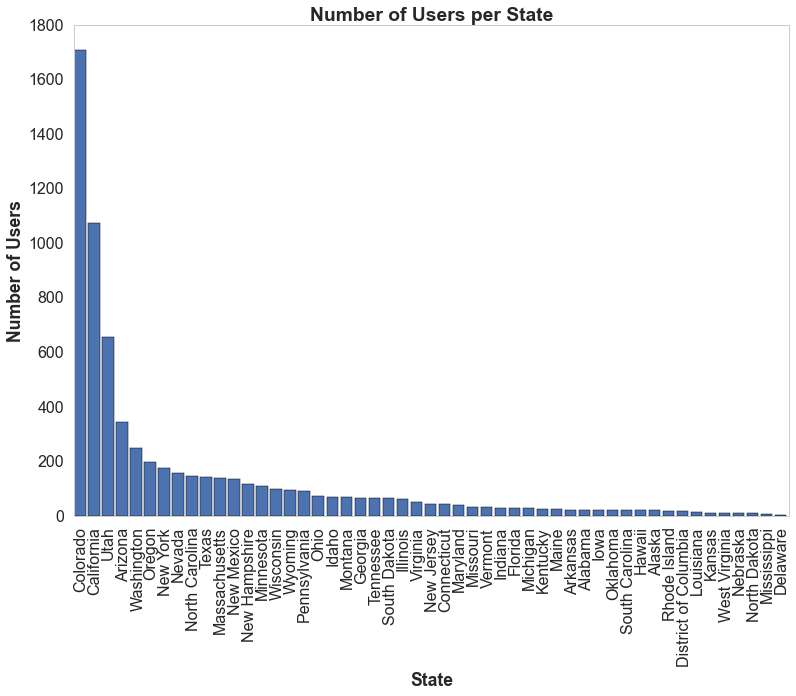

In [91]:
plt.bar(b,a)
plt.xticks(b,c, rotation = 'vertical', ha = 'left')
plt.grid(False)
plt.ylabel('Number of Users', fontweight = 'bold')
plt.xlabel('State', fontweight = 'bold')
plt.xlim(0,len(b))
plt.title('Number of Users per State', fontweight = 'bold')

In [93]:
y = userdf['age'].values
z = y[~np.isnan(y)]

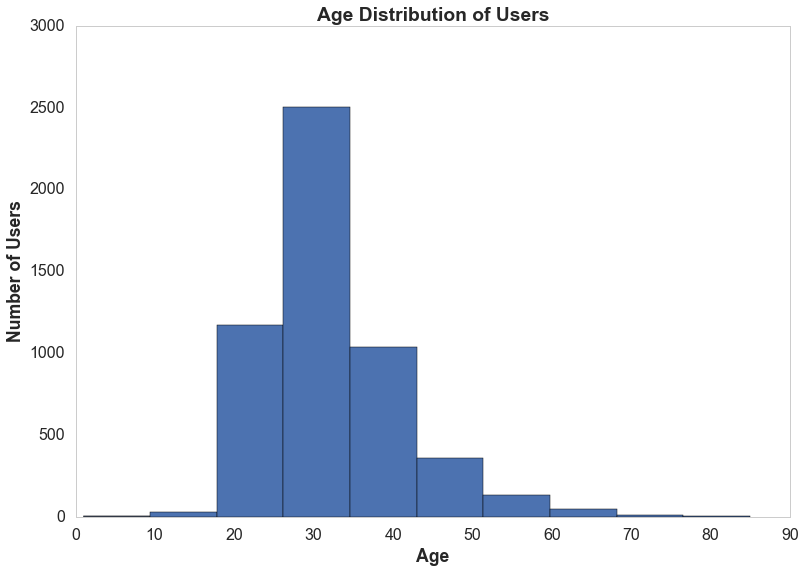

In [94]:
plt.hist(z)
plt.grid(False)
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Number of Users', fontweight = 'bold')
plt.title('Age Distribution of Users', fontweight = 'bold')

In [95]:
x = userdf.groupby('gender')['user_id'].count()
a = x.values
b = x.index.values
c = ['male','female']

In [103]:
print a

[6222  792]


In [104]:
print b

[ 0.  1.]


In [105]:
print c

['male', 'female']


In [109]:
#plt.figure(num=None, figsize=(1, 8))
gender_df = pd.DataFrame({'count': a, 'gender':['male','female']})
gender_df.head()

,count,gender
0,6222,male
1,792,female


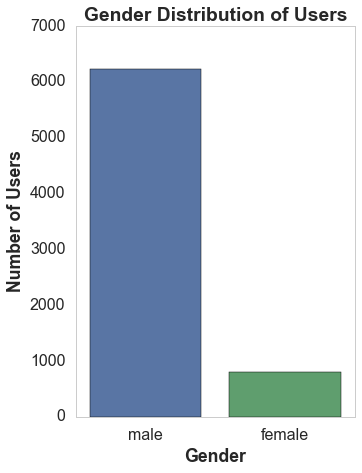

In [118]:
plt.figure(num = None, figsize = (5,7))
sns.barplot(x = 'gender', y = 'count', data = gender_df)
#.xticks(b,c, ha = 'left')
plt.grid(False)
plt.xlabel('Gender', fontweight = 'bold')
plt.ylabel('Number of Users', fontweight = 'bold')
plt.title('Gender Distribution of Users', fontweight = 'bold')

In [119]:
ucdf = pd.read_csv("cleaned_data/cleaned-all-joined-df.csv")
ucdf.head()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (6,7,8,9,71,72,73,74,83,84,85,86,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,climb_id,user_id,star_rating,tick_date,ticked,sugg_aid_grade,sugg_boulder_grade,sugg_ice_grade,sugg_mixed_grade,sugg_rock_grade,sugg_ice_grade_number,sugg_boulder_grade_number,sugg_aid_grade_number,sugg_mixed_grade_number,sugg_rock_grade_number,climbs_trad,gender,age,climbs_aid,user_country,user_state,user_city,user_zip_code,climbs_ice,climbs_boulder,user_link,climbs_mixed,climbs_sport,member_date,user_name,lead_diff_sport,boulder_diff,follow_diff_sport,lead_diff_ice,lead_diff_trad,follow_diff_ice,follow_diff_trad,follow_diff_mixed,lead_diff_mixed,follow_diff_aid,lead_diff_aid,lead_diff_sport_number,follow_diff_aid_number,lead_diff_ice_number,follow_diff_sport_number,follow_diff_mixed_number,lead_diff_aid_number,lead_diff_mixed_number,lead_diff_trad_number,...,user_state_geo,user_zip_geo,climb_name,climb_link,fa_year,feet,page_views,pitches,avg_stars,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,"type_TR,",type_aid,type_alpine,type_boulder,type_ice,type_mixed,type_sport,type_trad,guide_aid_grade,guide_boulder_grade,guide_ice_grade,guide_mixed_grade,guide_rock_grade,concensus_aid_grade,concensus_boulder_grade,concensus_ice_grade,concensus_mixed_grade,concensus_rock_grade,guide_aid_grade_number,guide_rock_grade_number,guide_boulder_grade_number,concensus_rock_grade_number,concensus_boulder_grade_number,concensus_ice_grade_number,guide_ice_grade_number,concensus_mixed_grade_number,guide_mixed_grade_number,concensus_aid_grade_number,state,latitude_y,longitude_y
0,0,105714713,10246,2,NaN,NaN,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,8,1,0,38,1,USA,UT,Salt Lake City,NaN,1,1,https://www.mountainproject.com/u/andrew-gram/...,0,1,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",andrew-gram,5.9,V1,5.10a,WI3,5.9,WI5,5.10b,NaN,NaN,C1,C3,9,1,3,10.0,NaN,3,NaN,9,...,Utah,NaN,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8-,NaN,8,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
1,1,105714713,105790589,2,NaN,NaN,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,8,1,0,37,0,USA,SD,Rapid City,NaN,0,1,https://www.mountainproject.com/u/brian-k//105...,0,1,"(2006, 1, 26, 0, 0, 0, 3, 26, -1)",brian-k,0,V0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,South Dakota,NaN,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8-,NaN,8,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
2,2,105714713,105829183,2,"time.struct_time(tm_year=2007, tm_mon=4, tm_md...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,37,0,USA,SD,Rapid City,NaN,0,0,https://www.mountainproject.com/u/joelhagan//1...,0,1,"(2006, 5, 31, 0, 0, 0, 2, 151, -1)",joelhagan,5.9,NaN,5.10b,NaN,5.9,NaN,5.10a,NaN,NaN,NaN,NaN,9,NaN,NaN,10.5,NaN,NaN,NaN,9,...,South Dakota,NaN,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8-,NaN,8,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
3,3,105714713,105883077,NaN,"time.struct_time(tm_year=2006, tm_mon=11, tm_m...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,30,0,USA,VA,Fairfax,NaN,0,0,https://www.mountainproject.com/u/paxton-alsga...,0,1,"(2006, 11, 5, 0, 0, 0, 6, 309, -1)",paxton-alsgaard,5.9,NaN,5.10a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,Virginia,NaN,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.

In [131]:
ucdf_stars_count = ucdf.groupby('star_rating')['user_id'].count()

In [132]:
ucdf_stars_count.head()

star_rating
0      2623
1     44179
2    187751
3    241766
4    144734
Name: user_id, dtype: int64

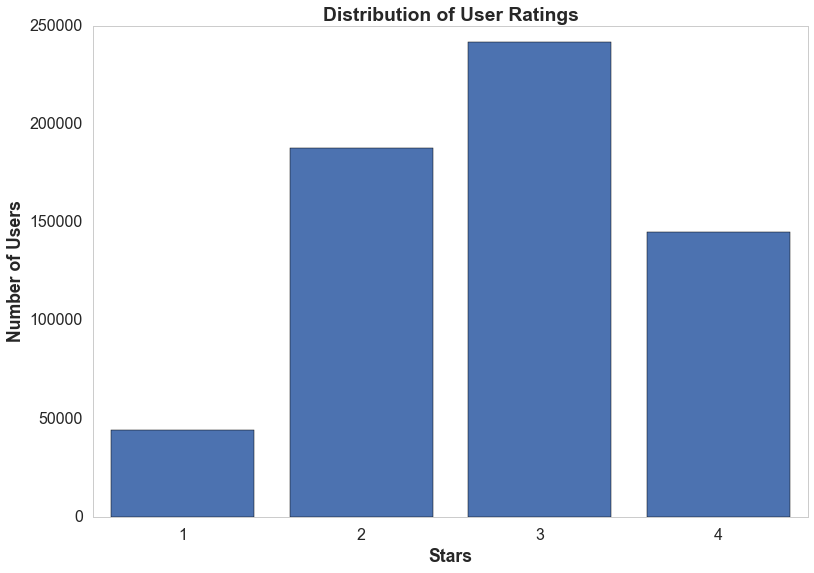

In [145]:
a = ucdf_stars_count.values[1:]
b = ucdf_stars_count.index[1:]


plt.bar(b,a, align = 'center')
plt.grid(False)
plt.xticks(range(1,5))
plt.xlabel('Stars', fontweight = 'bold')
plt.ylabel('Number of Users', fontweight = 'bold')
plt.title('Distribution of User Ratings', fontweight = 'bold')

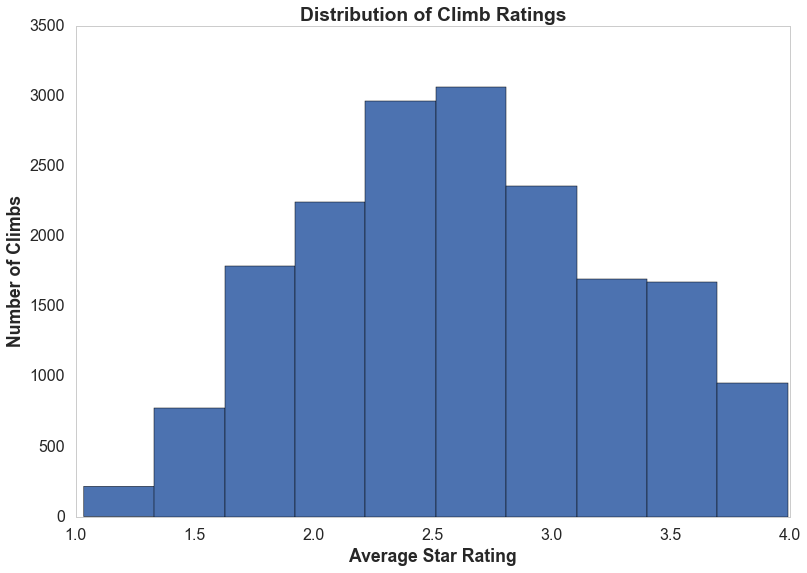

In [146]:
climbdf_avg_stars = climbdf.avg_stars
x = climbdf_avg_stars[climbdf_avg_stars >= 1]
plt.hist(x)
plt.grid(False)

plt.xlabel('Average Star Rating', fontweight = 'bold')
plt.ylabel('Number of Climbs', fontweight = 'bold')
plt.title('Distribution of Climb Ratings', fontweight = 'bold')